In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Load iris dataset from UCI Machine Learning Repository into a DataFrame
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                header=None)
df.tail() # print last 5 lines

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


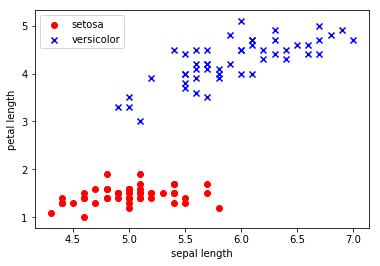

In [3]:
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values # get array of names (first 50 is Iris-setosa, last 50 is Iris-versicolor)
y = np.where(y == 'Iris-setosa', -1, 1) # -1 if iris setosa, 1 for versicolor
X = df.iloc[0:100, [0,2]].values # sepal length and petal length
plt.scatter(X[:50, 0], X[:50, 1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color='blue', marker="x", label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

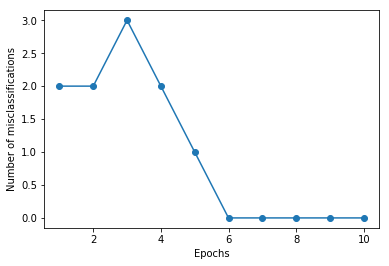

In [4]:
from perceptron import Perceptron
# Train perceptron algorithm on Iris data subset just extracted
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [25]:
from matplotlib.colors import ListedColormap

#visualize decision boundaries for 2D datasets

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # min and max of first feature
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # and max of second feature
    
    # arange creates a range of values as an array determined by the step-size resolution
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # xx1 is 305 rows of range of x1
    # xx2 is 305 rows, where each row contains same value, while all rows span the range of xx2
    # This is to create data points of all possible combinations in grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel returns contiguous flattened array
    Z = Z.reshape(xx1.shape) # reshape to same size as xx1 and xx2
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # contour plot
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                    marker = markers[idx], label=cl)

In [26]:
np.set_printoptions(threshold=np.nan)

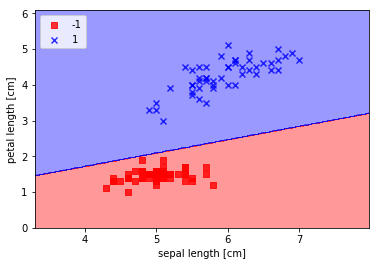

In [27]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [32]:
X[y == 1, 0].shape
X[y==-1, 1].shape

(50,)